In [61]:
from IPython.display import display, Math
import numpy as np
import matplotlib.pyplot as plot

In [74]:
def L(k,m,debug = False):
    if debug:
        print(f"calling L({k},{m})")
        
    if m == 0:
        return ("1", "1", "1")
    if m == 1:
        return (f"1 + {k} - x", f"{1 + k} - x", f"1 + {k} - x")
    
    L1 = L(k,m-1)
    L2 = L(k, m-2)
    
    su = f"\\frac{{(2 \\cdot {m}) - 1 + {k} - x}}{{{m}}}\\qty(" + L1[0] + f")- \\frac{{{m} - 1 + {k}}}{{ {m} }}\\qty(" + L2[0] + ")"
    sa = f"\\frac{{{2 * m - 1 + k} - x}}{{{m}}}\\qty(" + L1[1] + f")- \\frac{{{m - 1 + k}}}{{{m}}}\\qty(" + L2[1] + ")"
    se = f"(((2 * {m}) - 1 + {k} - x) / ({m})) * ({L1[2]}) - (({m} - 1 + {k})/({m})) * ({L1[2]})"
    
    return (su, sa, se)

In [118]:
n = 4
l = 0

lag = L(2 * l + 1, n - l - 1)

print(lag[0])
display(Math(lag[0]))
print(lag[1])
display(Math(lag[1]))

\frac{(2 \cdot 3) - 1 + 1 - x}{3}\qty(\frac{(2 \cdot 2) - 1 + 1 - x}{2}\qty(1 + 1 - x)- \frac{2 - 1 + 1}{ 2 }\qty(1))- \frac{3 - 1 + 1}{ 3 }\qty(1 + 1 - x)


<IPython.core.display.Math object>

\frac{6 - x}{3}\qty(\frac{4 - x}{2}\qty(2 - x)- \frac{2}{2}\qty(1))- \frac{3}{3}\qty(2 - x)


<IPython.core.display.Math object>

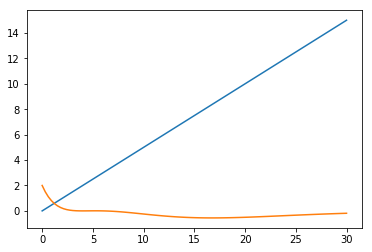

In [119]:
#ab hier funktioniert gar nix mehr :/

Z = 1
aB = 1
start = 0
stop = 30
length = 100

expr = f"(x**{l}) * ({lag[2]})"

x = np.linspace(start, stop, length)

rhos = np.array([((2 * Z * xi)/(n * aB)) for xi in x])

plot.plot(x, rhos)

rhosp = np.array([np.exp(- xi / 2) * (xi**l) * eval(expr, { "x": xi }) for xi in rhos])

plot.plot(x, rhosp)

y = np.sqrt(((2 * Z) / (n * aB))**3 * ( np.math.factorial(n - l - 1) / (2 * n * np.math.factorial(n + l)) )) * rhosp

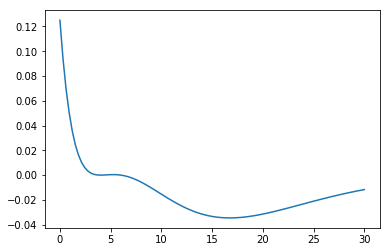

In [120]:
#x1,x2,y1,y2 = plot.axis()  
#plot.axis((x1,x2,-0.1,0.1))

plot.plot(x, y / aB)